# Data science explorer - project 002 Loan Prediction

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
#present the figure in program lines without typing show()
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read in and quick explore of the data 

In [2]:
dt_1 = pd.read_csv('train_ctrUa4K.csv')
print('Print the first 5 recirds in the dataset')
print(dt_1.head())
print(' ')
print('Basic descriptive statistics of all the variables')
print(dt_1.describe())
print(' ')
print('Present the features attributes')
print(dt_1.info())

Print the first 5 recirds in the dataset
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0        

##### Need to be aware that with 614 total records, some of the features got missing value. Entries need to be imputed or drop.
##### They are Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History. 7 features in total.
##### Make a quick guess before we check the distribution of the variables. 
1. Loan_ID           Should not be relevant
2. Gender            Ideally should not be relevant
3. Married           'Yes' would be better
4. Dependents        'With dependents' would be better
5. Education         Higher the better
6. Self_Employed     Not sure
7. ApplicantIncome   Higher the better
8. CoapplicantIncome Higher the better
9. LoanAmount        Not sure
10. Loan_Amount_Term  Not sure
11. Credit_History    'With credit history' would be better
12. Property_Area     'Urban' would be better

### Present the distribution of all the variables

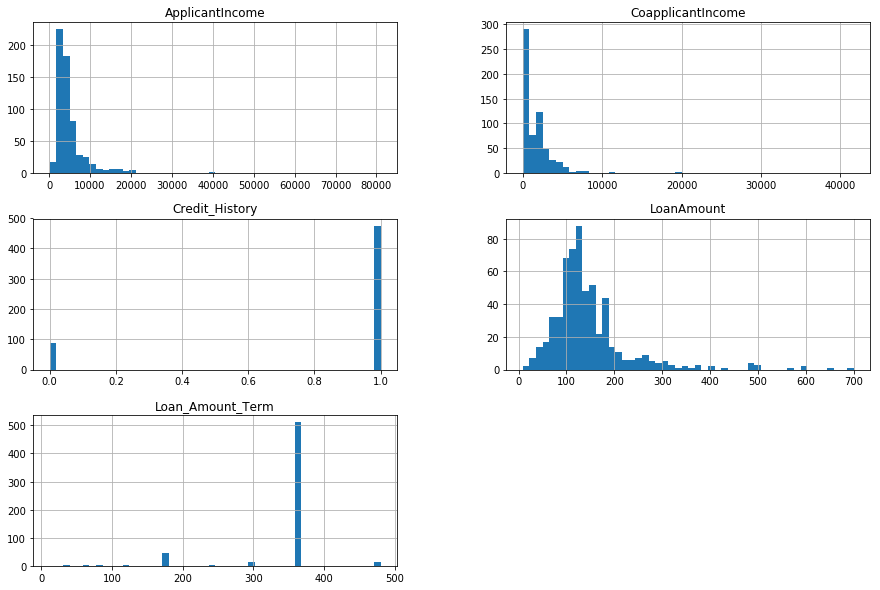

In [3]:
dt_1.hist(bins=50, figsize=(15, 10))
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


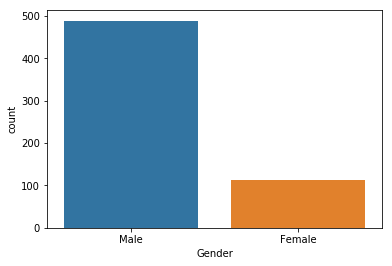

AxesSubplot(0.125,0.125;0.775x0.755)


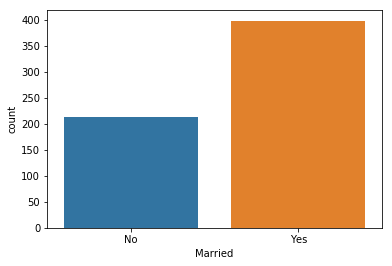

AxesSubplot(0.125,0.125;0.775x0.755)


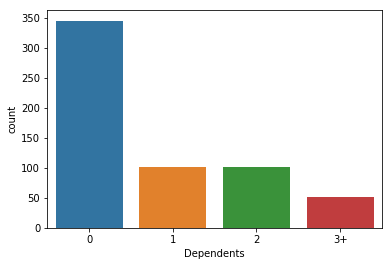

AxesSubplot(0.125,0.125;0.775x0.755)


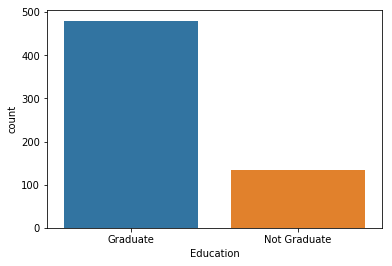

AxesSubplot(0.125,0.125;0.775x0.755)


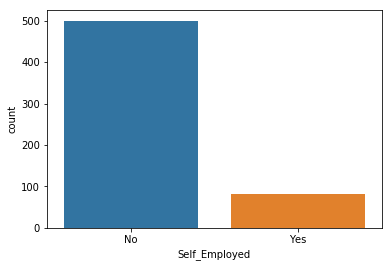

AxesSubplot(0.125,0.125;0.775x0.755)


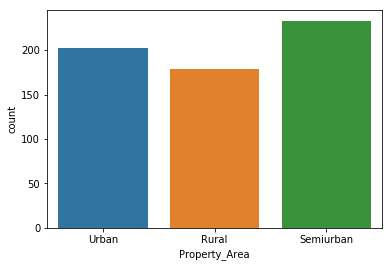

AxesSubplot(0.125,0.125;0.775x0.755)


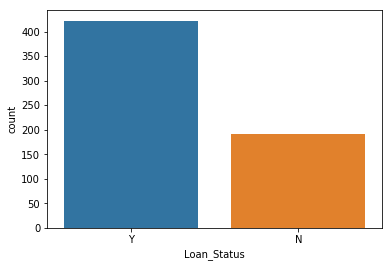

In [4]:
dt_obj = dt_1.select_dtypes(include='object')
#print(dt_obj.head())

#print(dt_obj.iloc[:, 1:].columns)

for col in dt_obj.iloc[:, 1:].columns:
    print(sns.countplot(x=col, data=dt_obj))
    plt.show()
#sns.countplot(x='Gender', data=dt_obj)
#sns.countplot(x='Married', data=dt_obj)
#sns.countplot(x='Dependents', data=dt_obj)
#sns.countplot(x='Education', data=dt_obj)
#sns.countplot(x='Self_Employed', data=dt_obj)
#sns.countplot(x='Property_Area', data=dt_obj)
#sns.countplot(x='Loan_Status', data=dt_obj)
#plt.show()

### Check the distribution of each variable between Loan_status = 'Y' vs 'N'

In [5]:
#print(dt_Y['LoanAmount'][dt_Y['LoanAmount'].isnull()==False])
#print(dt_Y['Loan_Amount_Term'])

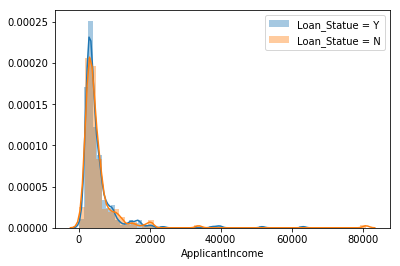

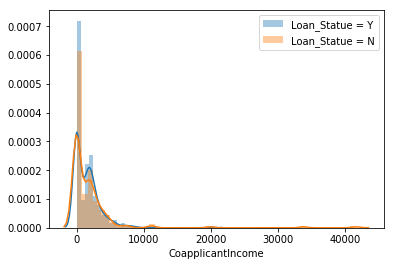

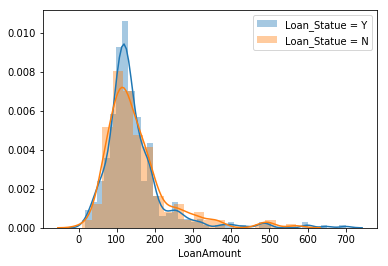

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


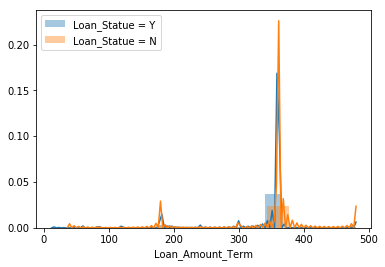

In [6]:
dt_Y = dt_1[dt_1['Loan_Status']=='Y']
dt_N = dt_1[dt_1['Loan_Status']=='N']

sns.distplot(dt_Y['ApplicantIncome'], label='Loan_Statue = Y')
sns.distplot(dt_N['ApplicantIncome'], label='Loan_Statue = N')
plt.legend()
plt.show()
sns.distplot(dt_Y['CoapplicantIncome'], label='Loan_Statue = Y')
sns.distplot(dt_N['CoapplicantIncome'], label='Loan_Statue = N')
plt.legend()
plt.show()
sns.distplot(dt_Y['LoanAmount'][dt_Y['LoanAmount'].isnull()==False], label='Loan_Statue = Y')
sns.distplot(dt_N['LoanAmount'][dt_N['LoanAmount'].isnull()==False], label='Loan_Statue = N')
plt.legend()
plt.show()
#ValueError: cannot convert float NaN to integer => Not sure why

sns.distplot(dt_Y['Loan_Amount_Term'], label='Loan_Statue = Y')
sns.distplot(dt_N['Loan_Amount_Term'], label='Loan_Statue = N')
plt.legend()
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


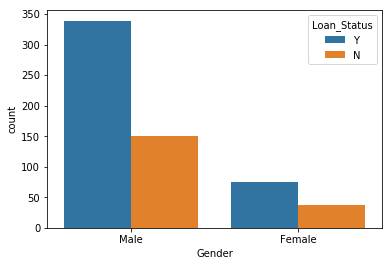

AxesSubplot(0.125,0.125;0.775x0.755)


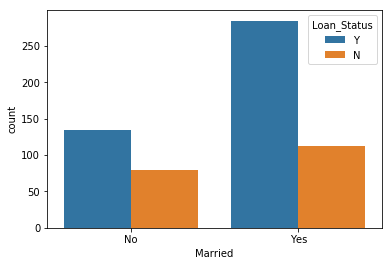

AxesSubplot(0.125,0.125;0.775x0.755)


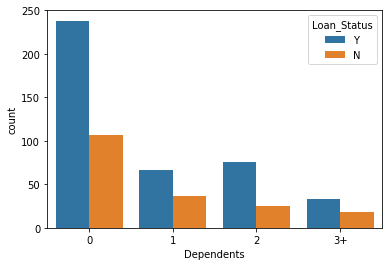

AxesSubplot(0.125,0.125;0.775x0.755)


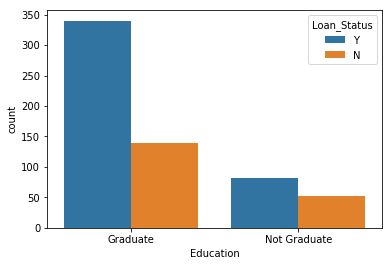

AxesSubplot(0.125,0.125;0.775x0.755)


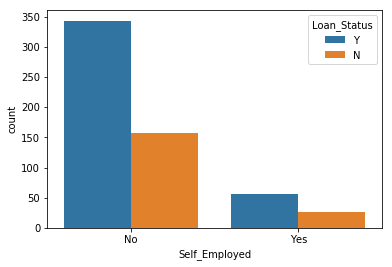

In [7]:
for col in dt_obj.iloc[:, 1:6].columns:
    print(sns.countplot(x=col, data=dt_obj, hue='Loan_Status'))
    plt.show()

### The higher Y/N ratio, the higher possibility to get the loan application approved

# 2. Fill out the missing value. Here I just use the mode of each variable to fill out null entries.

In [8]:
def fill_mode(x):
    dt_1[x].fillna(dt_1[x].mode()[0], inplace=True)

In [9]:
#dt_1['Gender'].fillna(dt_1['Gender'].mode()[0], inplace=True)
fill_mode('Gender')
fill_mode('Married')
fill_mode('Dependents')
fill_mode('Self_Employed')
fill_mode('LoanAmount')
fill_mode('Loan_Amount_Term')
fill_mode('Credit_History')

In [10]:
#Make sure all the null have been filled
for columns in dt_1.columns:
    print('Variable', columns, '/with missing entry:', sum(dt_1[columns].isnull()))

Variable Loan_ID /with missing entry: 0
Variable Gender /with missing entry: 0
Variable Married /with missing entry: 0
Variable Dependents /with missing entry: 0
Variable Education /with missing entry: 0
Variable Self_Employed /with missing entry: 0
Variable ApplicantIncome /with missing entry: 0
Variable CoapplicantIncome /with missing entry: 0
Variable LoanAmount /with missing entry: 0
Variable Loan_Amount_Term /with missing entry: 0
Variable Credit_History /with missing entry: 0
Variable Property_Area /with missing entry: 0
Variable Loan_Status /with missing entry: 0


# 3. Do One-Hot encoding for categorical data by using sklearn

In [11]:
dt_obj = dt_1.select_dtypes(include='object')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

labelencoder = LabelEncoder()
for col in dt_obj.iloc[:, 1:].columns:
    dt_obj[col]= labelencoder.fit_transform(dt_obj[col])

print(dt_obj.head())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1  


In [12]:
#print(dt_obj.iloc[:, 1:7])

In [13]:
onehotencoder = OneHotEncoder(categorical_features = 'all')
data_ohe=onehotencoder.fit_transform(dt_obj.iloc[:, 1:7]).toarray()
dt_objx = pd.DataFrame(data_ohe)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:382: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)


##### Construct the dataset for model

In [14]:
print(dt_1.select_dtypes(exclude='object').head())
print('')
print(dt_obj.iloc[:, 7].head()) #Target_variable
print('')
print(dt_objx.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       120.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14
0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0
1  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0
2  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
3  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0

In [15]:
dt_1.head()
dt_1x = dt_1.select_dtypes(exclude='object')
#dt_1x.merge(dt_objx)
X = dt_1x.reset_index().merge(dt_objx.reset_index(), left_on='index', right_on='index')
y = dt_obj.iloc[:, 7]

# 4. Conduct Decision Tree and Random Forest

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#print(scores.mean())
#Default score for Decision Tree: Mean accuracy of self.predict(X) wrt. y. 
#accuracy = # of correct / # of prediction

clrf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clrf, X, y, cv=5)
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#Default score for Random Forest: Mean accuracy of self.predict(X) wrt. y. 


Decision Tree Accuracy: 0.64 (+/- 0.21)
Random Forest Accuracy: 0.77 (+/- 0.07)


# 5. Conduct Random hyperparameter grid for Random Forest

In [24]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 700, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 86, 163, 240, 316, 393, 470, 546, 623, 700], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [28]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 86, 163, 240, 316, 393, 470, 546, 623, 700], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 86,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [31]:
clrf_grid = RandomForestClassifier(n_estimators=86, min_samples_split=2, min_samples_leaf= 4, max_features= 'sqrt', max_depth=10, random_state=0, bootstrap= True)
scores = cross_val_score(clrf_grid, X, y, cv=5)
print("Grid Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#Default score for Random Forest: Mean accuracy of self.predict(X) wrt. y. 

Grid Random Forest Accuracy: 0.80 (+/- 0.06)


# 6. Try with XGBoost

In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

In [41]:
xgb = XGBClassifier()
#kfold = KFold(n_splits=5, random_state=7)
results = cross_val_score(xgb, X, y, cv=5)
print("XGBoost Accuracy: %.2f (+/- %.2f)" % (results.mean(), results.std()* 2))

XGBoost Accuracy: 0.78 (+/- 0.10)


# 7. Work on the same with the Test data

In [42]:
test = pd.read_csv('test_lAUu6dG.csv')

def tfill_mode(x):
    test[x].fillna(test[x].mode()[0], inplace=True)

tfill_mode('Gender')
tfill_mode('Married')
tfill_mode('Dependents')
tfill_mode('Self_Employed')
tfill_mode('LoanAmount')
tfill_mode('Loan_Amount_Term')
tfill_mode('Credit_History')

In [44]:
test_obj = test.select_dtypes(include='object')

labelencoder = LabelEncoder()
for col in dt_obj.iloc[:, 1:6].columns:
    test_obj[col]= labelencoder.fit_transform(test_obj[col])

print(test_obj.head())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001015       1        1           0          0              0   
1  LP001022       1        1           1          0              0   
2  LP001031       1        1           2          0              0   
3  LP001035       1        1           2          0              0   
4  LP001051       1        0           0          1              0   

  Property_Area  
0         Urban  
1         Urban  
2         Urban  
3         Urban  
4         Urban  


In [47]:
onehotencoder = OneHotEncoder(categorical_features = 'all')
test_ohe=onehotencoder.fit_transform(test_obj.iloc[:, 1:7]).toarray()
test_objx = pd.DataFrame(test_ohe)

testx = test.select_dtypes(exclude='object')
test_X = testx.reset_index().merge(test_objx.reset_index(), left_on='index', right_on='index')
#print(test_X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:382: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:382: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)


In [55]:
clrf_grid.fit(X, y)

result_RF = clrf_grid.predict(test_X)

SJ_submitt=pd.DataFrame({"Loan_ID": test['Loan_ID'], "Loan_Status":result_RF})
print(SJ_submitt.head())

    Loan_ID  Loan_Status
0  LP001015            1
1  LP001022            1
2  LP001031            1
3  LP001035            1
4  LP001051            1


In [57]:
pd.DataFrame(SJ_submitt).to_csv("submit_SJ.csv", index=False)